## 作業
在鐵達尼資料集中，
透過進階補值方法 KNN，將鐵達尼號中的 Titanic_train
.csv 中的 age 的遺失值進行補值。    
* step1: 觀察 Age 和 Pclass 與 Sex 是否有關連性?
* step2: 如果有關連性，運用 KNN ，取出 Age 、 Pclass、 Sex的資料，以 Sex 與 Pclass 補 Age 遺失值。 

In [1]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

## 讀入資料

In [26]:
df = pd.read_csv("Titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 觀察 Age

In [3]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [4]:
print(len(df['Age']))
df['Age'].isnull().sum()

891


177

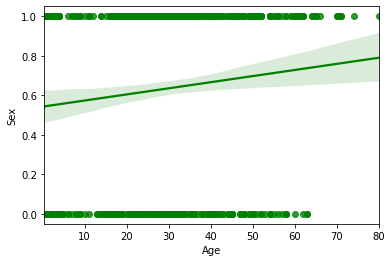

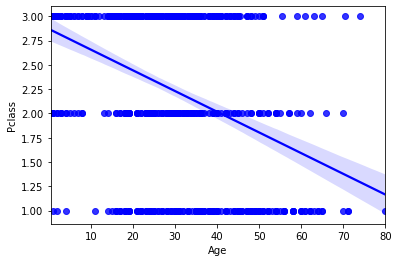

In [34]:
from sklearn import preprocessing
#下面兩行程式，讓 Male=1, FeMale-0.
le = preprocessing.LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

g = sns.regplot(x="Age", y="Sex", color="g",data=df)
plt.show()
f = sns.regplot(x="Age", y="Pclass", color="b",data=df)

In [35]:
#整張表有nan的地方
missing_index=df.isnull()
#df.isnull()
print(df[df.isnull().values==True])

     PassengerId  Survived  Pclass                                      Name  \
0              1         0       3                   Braund, Mr. Owen Harris   
2              3         1       3                    Heikkinen, Miss. Laina   
4              5         0       3                  Allen, Mr. William Henry   
5              6         0       3                          Moran, Mr. James   
5              6         0       3                          Moran, Mr. James   
..           ...       ...     ...                                       ...   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
890          891         0       3                       Dooley, Mr. Patrick   

     Sex   Age  SibSp  Parch           

In [6]:
import sklearn
from sklearn.metrics.pairwise import nan_euclidean_distances
sklearn.__version__

'0.23.2'

In [19]:
sns.__version__

'0.9.0'

In [8]:
from sklearn.metrics.pairwise import nan_euclidean_distances
df1=pd.concat([df['Age'],df['Sex']],axis = 1)
display(pd.DataFrame(nan_euclidean_distances(df1)))


,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
0,0.000000,16.031220,4.123106,13.038405,13.000000,0.000000,32.000000,20.000000,5.099020,8.062258,...,11.000000,1.000000,6.000000,3.000000,17.029386,5.000000,3.162278,1.414214,4.000000,10.000000
1,16.031220,0.000000,12.000000,3.000000,3.162278,1.414214,16.031220,36.013886,11.000000,24.000000,...,5.099020,16.000000,10.049876,13.038405,1.000000,11.045361,19.000000,0.000000,12.041595,6.082763
2,4.123106,12.000000,0.000000,9.000000,9.055385,1.414214,28.017851,24.020824,1.000000,12.000000,...,7.071068,4.000000,2.236068,1.414214,13.000000,1.414214,7.000000,0.000000,1.000000,6.082763
3,13.038405,3.000000,9.000000,0.000000,1.000000,1.414214,19.026298,33.015148,8.000000,21.000000,...,2.236068,13.000000,7.071068,10.049876,4.000000,8.062258,16.000000,0.000000,9.055385,3.162278
4,13.000000,3.162278,9.055385,1.000000,0.000000,0.000000,19.000000,33.000000,8.062258,21.023796,...,2.000000,13.038405,7.000000,10.000000,4.123106,8.000000,16.031220,1.414214,9.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,5.000000,11.045361,1.414214,8.062258,8.000000,0.000000,27.000000,25.000000,1.000000,13.038405,...,6.000000,5.099020,1.000000,2.000000,12.041595,0.000000,8.062258,1.414214,1.000000,5.000000
887,3.162278,19.000000,7.000000,16.000000,16.031220,1.414214,35.014283,17.029386,8.000000,5.000000,...,14.035669,3.000000,9.055385,6.082763,20.000000,8.062258,0.000000,0.000000,7.071068,13.038405
888,1.414214,0.000000,0.000000,0.000000,1.414214,1.414214,1.414214,1.414214,0.000000,0.000000,...,1.414214,0.000000,1.414214,1.414214,0.000000,1.414214,0.000000,0.000000,1.414214,1.414214
889,4.000000,12.041595,1.000000,9.055385,9.000000,0.000000,28.000000,24.000000,1.414214,12.041595,...,7.000000,4.123106,2.000000,1.000000,13.038405,1.000000,7.071068,1.414214,0.000000,6.000000


In [38]:
value_neighbors=1

df1=df.copy()

from sklearn.impute import KNNImputer
#初始化: Initialize KNNImputer
imputer = KNNImputer(n_neighbors=value_neighbors)
df_filled = pd.DataFrame(imputer.fit_transform(df1[['Age','Sex','Pclass']]))

df_filled.columns = ['Age','Sex','Pclass']
display(df_filled)

,Age,Sex,Pclass
0,22.0,1.0,3.0
1,38.0,0.0,1.0
2,26.0,0.0,3.0
3,35.0,0.0,1.0
4,35.0,1.0,3.0
...,...,...,...
886,27.0,1.0,2.0
887,19.0,0.0,1.0
888,26.0,0.0,3.0
889,26.0,1.0,1.0


In [39]:
print(len(df_filled['Age']))
df_filled['Age'].isnull().sum()

891


0